In [1]:
from phoenix.potentials import miyamoto_nagai_potential as Phi
from phoenix.distributionfunctions import f_total_disc_from_params, f_total_disc, f_thin_disc

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:11: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:39: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [2]:
# Miyamoto–Nagai params (example numbers)
M, a, b = 1.0, 6.0, 0.3

In [3]:
params = {
    "R0_thin": 8.0,
    "Rd_thin": 3.0,
    "Sigma0_thin": 1e10,
    "RsigR_thin": 7.0,
    "RsigZ_thin": 1.0,
    "sigmaR0_R0_thin": 60.0,
    "sigmaz0_R0_thin": 30.0,
    "L0_thin": 50.0,
    "Rinit_for_Rc_thin": 8.0,
    "R0_thick": 8.0,    
    "Rd_thick": 3.0,
    "Sigma0_thick": 1e10,
    "RsigR_thick": 7.0,
    "RsigZ_thick": 1.0,
    "sigmaR0_R0_thick": 40.0,
    "sigmaz0_R0_thick": 20.0,
    "L0_thick": 30.0,
    "Rinit_for_Rc_thick": 8.0,
}

In [4]:
theta = (M, a, b)

In [5]:
Jr = 10.0
Jz = 5.0
Jphi = 2000.0
f_total_disc_from_params(Jr, Jz, Jphi, Phi, theta, params)

Array(0., dtype=float32)

In [6]:
f_total_disc(
    Jr, Jz, Jphi, Phi, *theta,
    R0_thin=8.0,
    Rd_thin=3.0,
    Sigma0_thin=1.0,
    RsigR_thin=7.0,
    RsigZ_thin=1.0,
    sigmaR0_R0_thin=60.0,
    sigmaz0_R0_thin=30.0,
    L0_thin=50.0,
    R0_thick=8.0,
    Rd_thick=3.0,
    Sigma0_thick=1.0,
    RsigR_thick=7.0,
    RsigZ_thick=1.0,
    sigmaR0_R0_thick=60.0,
    sigmaz0_R0_thick=30.0,
    L0_thick=50.0,
    Rinit_for_Rc_thin=8.0,
    Rinit_for_Rc_thick=8.0,
    f_thin=0.7,
    f_thick=0.3
)

Array(0., dtype=float32, weak_type=True)

In [7]:
f_thin_disc(
    Jr, Jz, Jphi, Phi, *theta,
    R0=8.0,
    Rd=3.0,
    Sigma0=1.0,
    RsigR=7.0,
    RsigZ=1.0,
    sigmaR0_R0=60.0,
    sigmaz0_R0=30.0,
    L0=50.0,
    Rinit_for_Rc=8.0,
)

Array(0., dtype=float32, weak_type=True)

In [8]:
from phoenix.distributionfunctions import Rc_from_Lz
jphi = 5.0
theta = (1.0, 6.0, 0.3)
Rc_from_Lz(Phi, jphi, 8.0, *theta)

Array(27.059933, dtype=float32, weak_type=True)

In [9]:
from phoenix.distributionfunctions import Omega
Om = Omega(Phi, 8.0, *theta)

In [10]:
from phoenix.distributionfunctions import kappa
kap = kappa(Phi, 8.0, *theta)

In [11]:
from phoenix.distributionfunctions import nu
nuu = nu(Phi, 8.0, *theta)

In [12]:
from phoenix.distributionfunctions import Sigma_exp, sigmaR_of_Rc, sigmaz_of_Rc
sig_exp = Sigma_exp(8.0, 8.0, 3.0, 1.0)

In [13]:
sigR = sigmaR_of_Rc(8.0, 8.0, 7.0, 60.0)

In [14]:
sigZ = sigmaz_of_Rc(8.0, 8.0, 1.0, 30.0)

In [15]:
import jax.numpy as jnp
pref = Om*sig_exp/(2.0*jnp.pi**2*kap*sigR**2*sigZ**2)
print(pref)

1.06678035e-08


In [16]:
JR = 10.0
eR =  eR   = jnp.exp(- kap * JR / sigR**2)
print(eR)

0.9998747


In [17]:
Jz = 5.0
eZ = jnp.exp(- nuu * Jz / sigZ**2)
print(eZ)

0.9992168


In [18]:
L0 = 50.0
jphi = 2000.0
rot = 0.5 * (1.0 + jnp.tanh(jphi / L0))
print(rot)

1.0


In [19]:
all = pref * eR * eZ * rot
print(all)

1.0658113e-08


In [20]:
from phoenix.distributionfunctions import quasi_isothermal_df
R0 = 8.0
Rd = 3.0
Sigma0 = 1e10
RsigR = 7.0
RsigZ = 1.0
sigmaR0_R0 = 60.0
sigmaz0_R0 = 30.0
L0 = 50.0
Rinit_for_Rc = 8.0

print("JR:", JR)
print("Jz:", Jz)
print("Jphi:", Jphi)
print("R0:", R0)
print("Rd:", Rd)
print("Sigma0:", Sigma0)
print("RsigR:", RsigR)
print("RsigZ:", RsigZ)
print("sigmaR0_R0:", sigmaR0_R0)
print("sigmaz0_R0:", sigmaz0_R0)
print("L0:", L0)
print("Rinit_for_Rc:", Rinit_for_Rc)

quasi_isothermal_df(JR, Jz, Jphi, Phi, *theta,
                               R0=R0, Rd=Rd, Sigma0=Sigma0,
                               RsigR=RsigR, RsigZ=RsigZ,
                               sigmaR0_R0=sigmaR0_R0, sigmaz0_R0=sigmaz0_R0,
                               L0=L0, Rinit_for_Rc=Rinit_for_Rc)

JR: 10.0
Jz: 5.0
Jphi: 2000.0
R0: 8.0
Rd: 3.0
Sigma0: 10000000000.0
RsigR: 7.0
RsigZ: 1.0
sigmaR0_R0: 60.0
sigmaz0_R0: 30.0
L0: 50.0
Rinit_for_Rc: 8.0


Array(0., dtype=float32, weak_type=True)

In [21]:
from phoenix.actionsampling3 import sample_df_potential
from jax import random
key = random.PRNGKey(0)
Jr, Jz, Jphi = sample_df_potential(key, params, 10000, 1, tau=0.01)

In [22]:
from phoenix.distributionfunctions import f_total_disc_from_params

weights = f_total_disc_from_params(Jr, Jz, Jphi, Phi, theta, params)

In [23]:
print(weights.shape)

(10000,)


In [24]:
print(len(weights))

10000


In [30]:
print(weights.max())

31.105942


(array([9.999e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

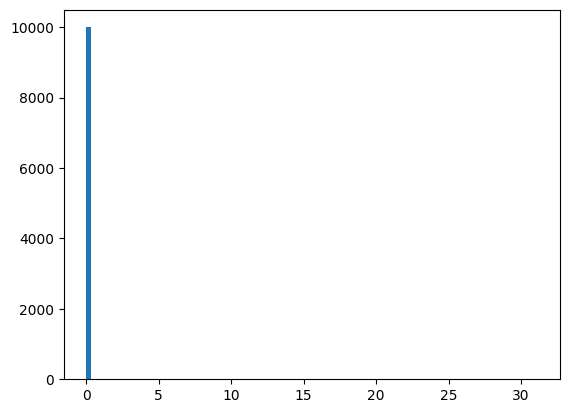

In [26]:
from matplotlib import pyplot as plt
plt.hist(weights, bins=100)

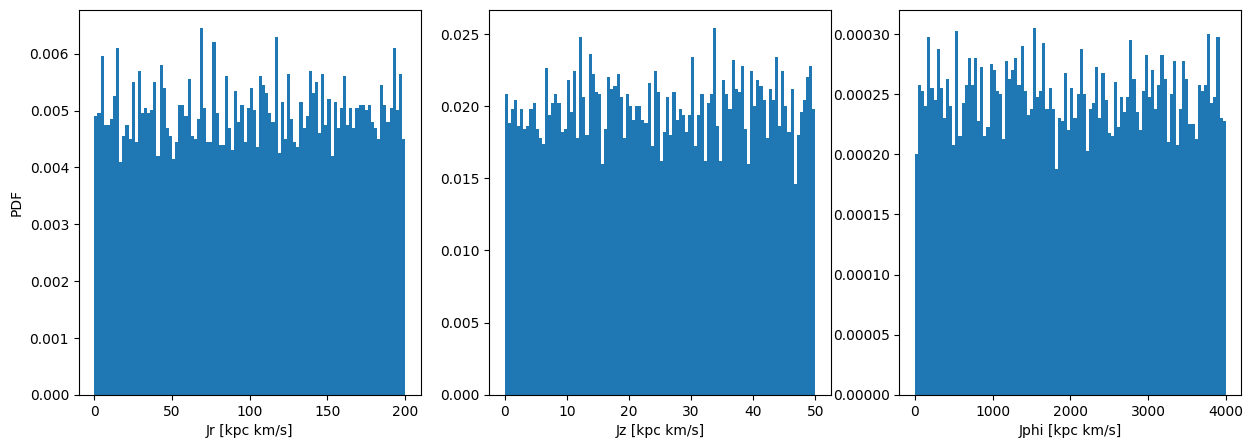

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(Jr, bins=100, density=True)
plt.xlabel('Jr [kpc km/s]')
plt.ylabel('PDF')
plt.subplot(132)
plt.hist(Jz, bins=100, density=True)            
plt.xlabel('Jz [kpc km/s]')
plt.subplot(133)
plt.hist(Jphi, bins=100, density=True)
plt.xlabel('Jphi [kpc km/s]')
plt.show()